This notebook uses the functions `sourmashconsumr::from_taxonomy_annotate_to_multi_strains()` to detect whether samples in an infant stool metagenome time series (PRJNA60717) contain multiple strains of any species.

In [1]:
remotes::install_github("Arcadia-Science/sourmashconsumr@ter/count-strains", force = T)

Skipping 1 packages not available: phyloseq

Running `R CMD build`...



* checking for file ‘/private/var/folders/76/q53ldgh1667_lm49fpxybglc0000gn/T/Rtmpz7IWRJ/remotes16cba53b19f3a/Arcadia-Science-sourmashconsumr-f7e1501/DESCRIPTION’ ... OK
* preparing ‘sourmashconsumr’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘sourmashconsumr_0.1.0.tar.gz’


In [3]:
library(sourmashconsumr)
library(dplyr, warn.conflicts = F)
library(ggplot2)

In [4]:
# set working directory to one level up, root of git repo
setwd("..")

In [5]:
infant_taxonomy_annotate_df <- read_taxonomy_annotate(Sys.glob("outputs/sourmash_taxonomy/day*.with-lineages.csv"))

## Staphylococcus epidermidis

In [6]:
infant_taxonomy_annotate_df_staph_epi <- infant_taxonomy_annotate_df %>%
  filter(species == "Staphylococcus epidermidis")

In [7]:
infant_multi_strain_staph_epi <- from_taxonomy_annotate_to_multi_strains(infant_taxonomy_annotate_df_staph_epi)

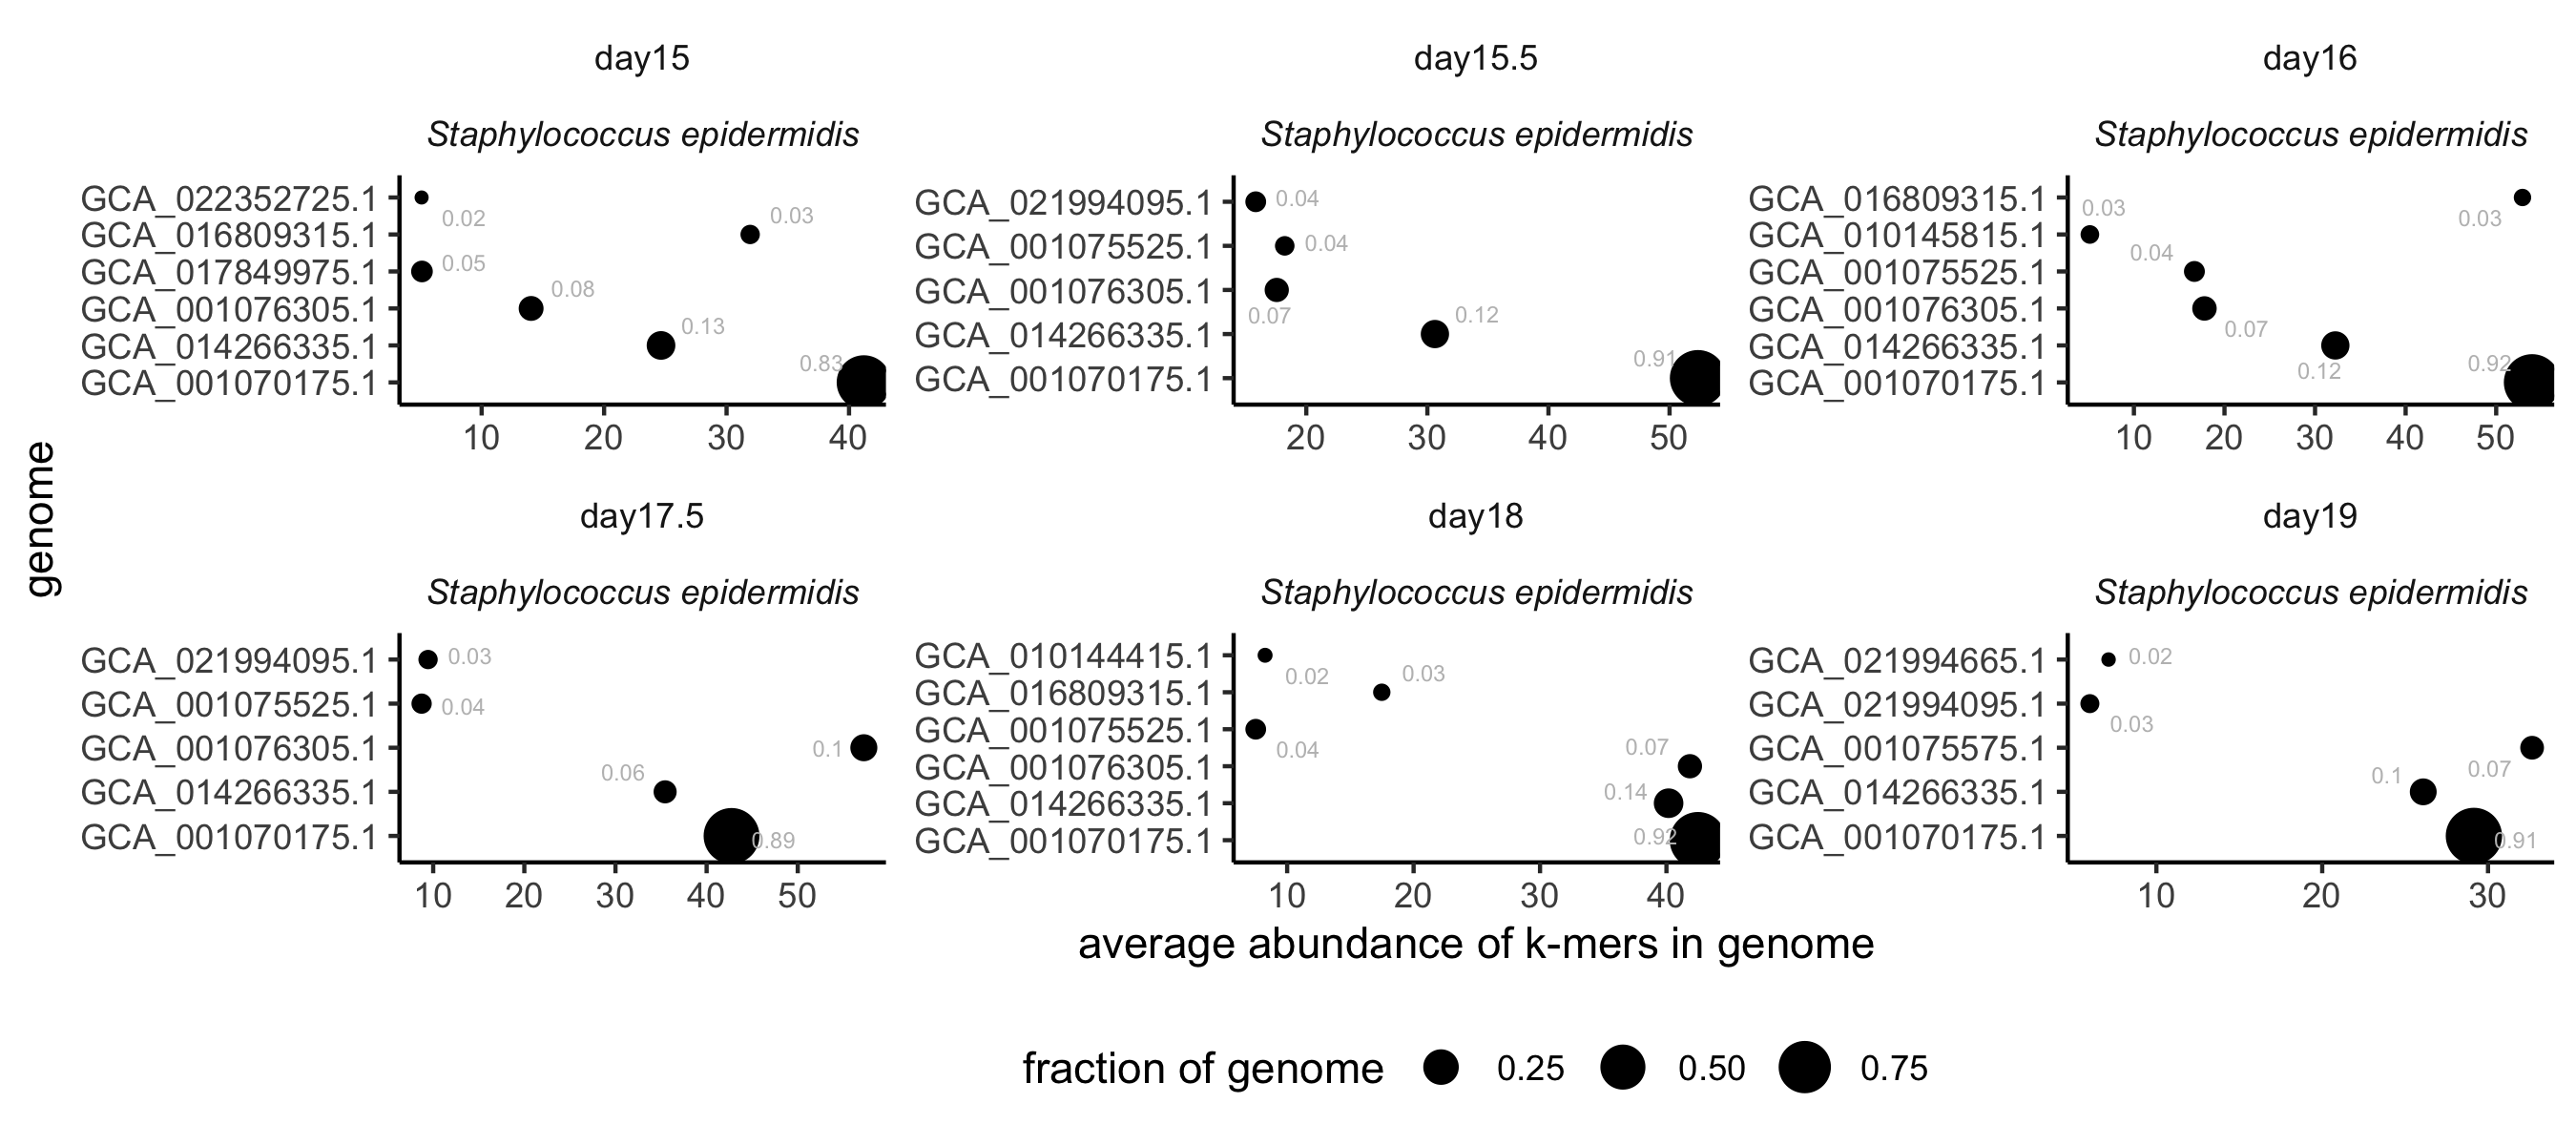

In [8]:
# adjust plot size rendered inline
options(repr.plot.width = 9, repr.plot.height = 4, repr.plot.res = 300)

infant_multi_strain_staph_epi$plt + 
 theme(legend.position = "bottom")

## Enterococcus faecalis

In [9]:
infant_taxonomy_annotate_df_e_faec <- infant_taxonomy_annotate_df %>%
  filter(species == "Enterococcus faecalis")

In [10]:
infant_multi_strain_e_faec <- from_taxonomy_annotate_to_multi_strains(infant_taxonomy_annotate_df_e_faec, 
                                                                      plot_threshold = 0.015)

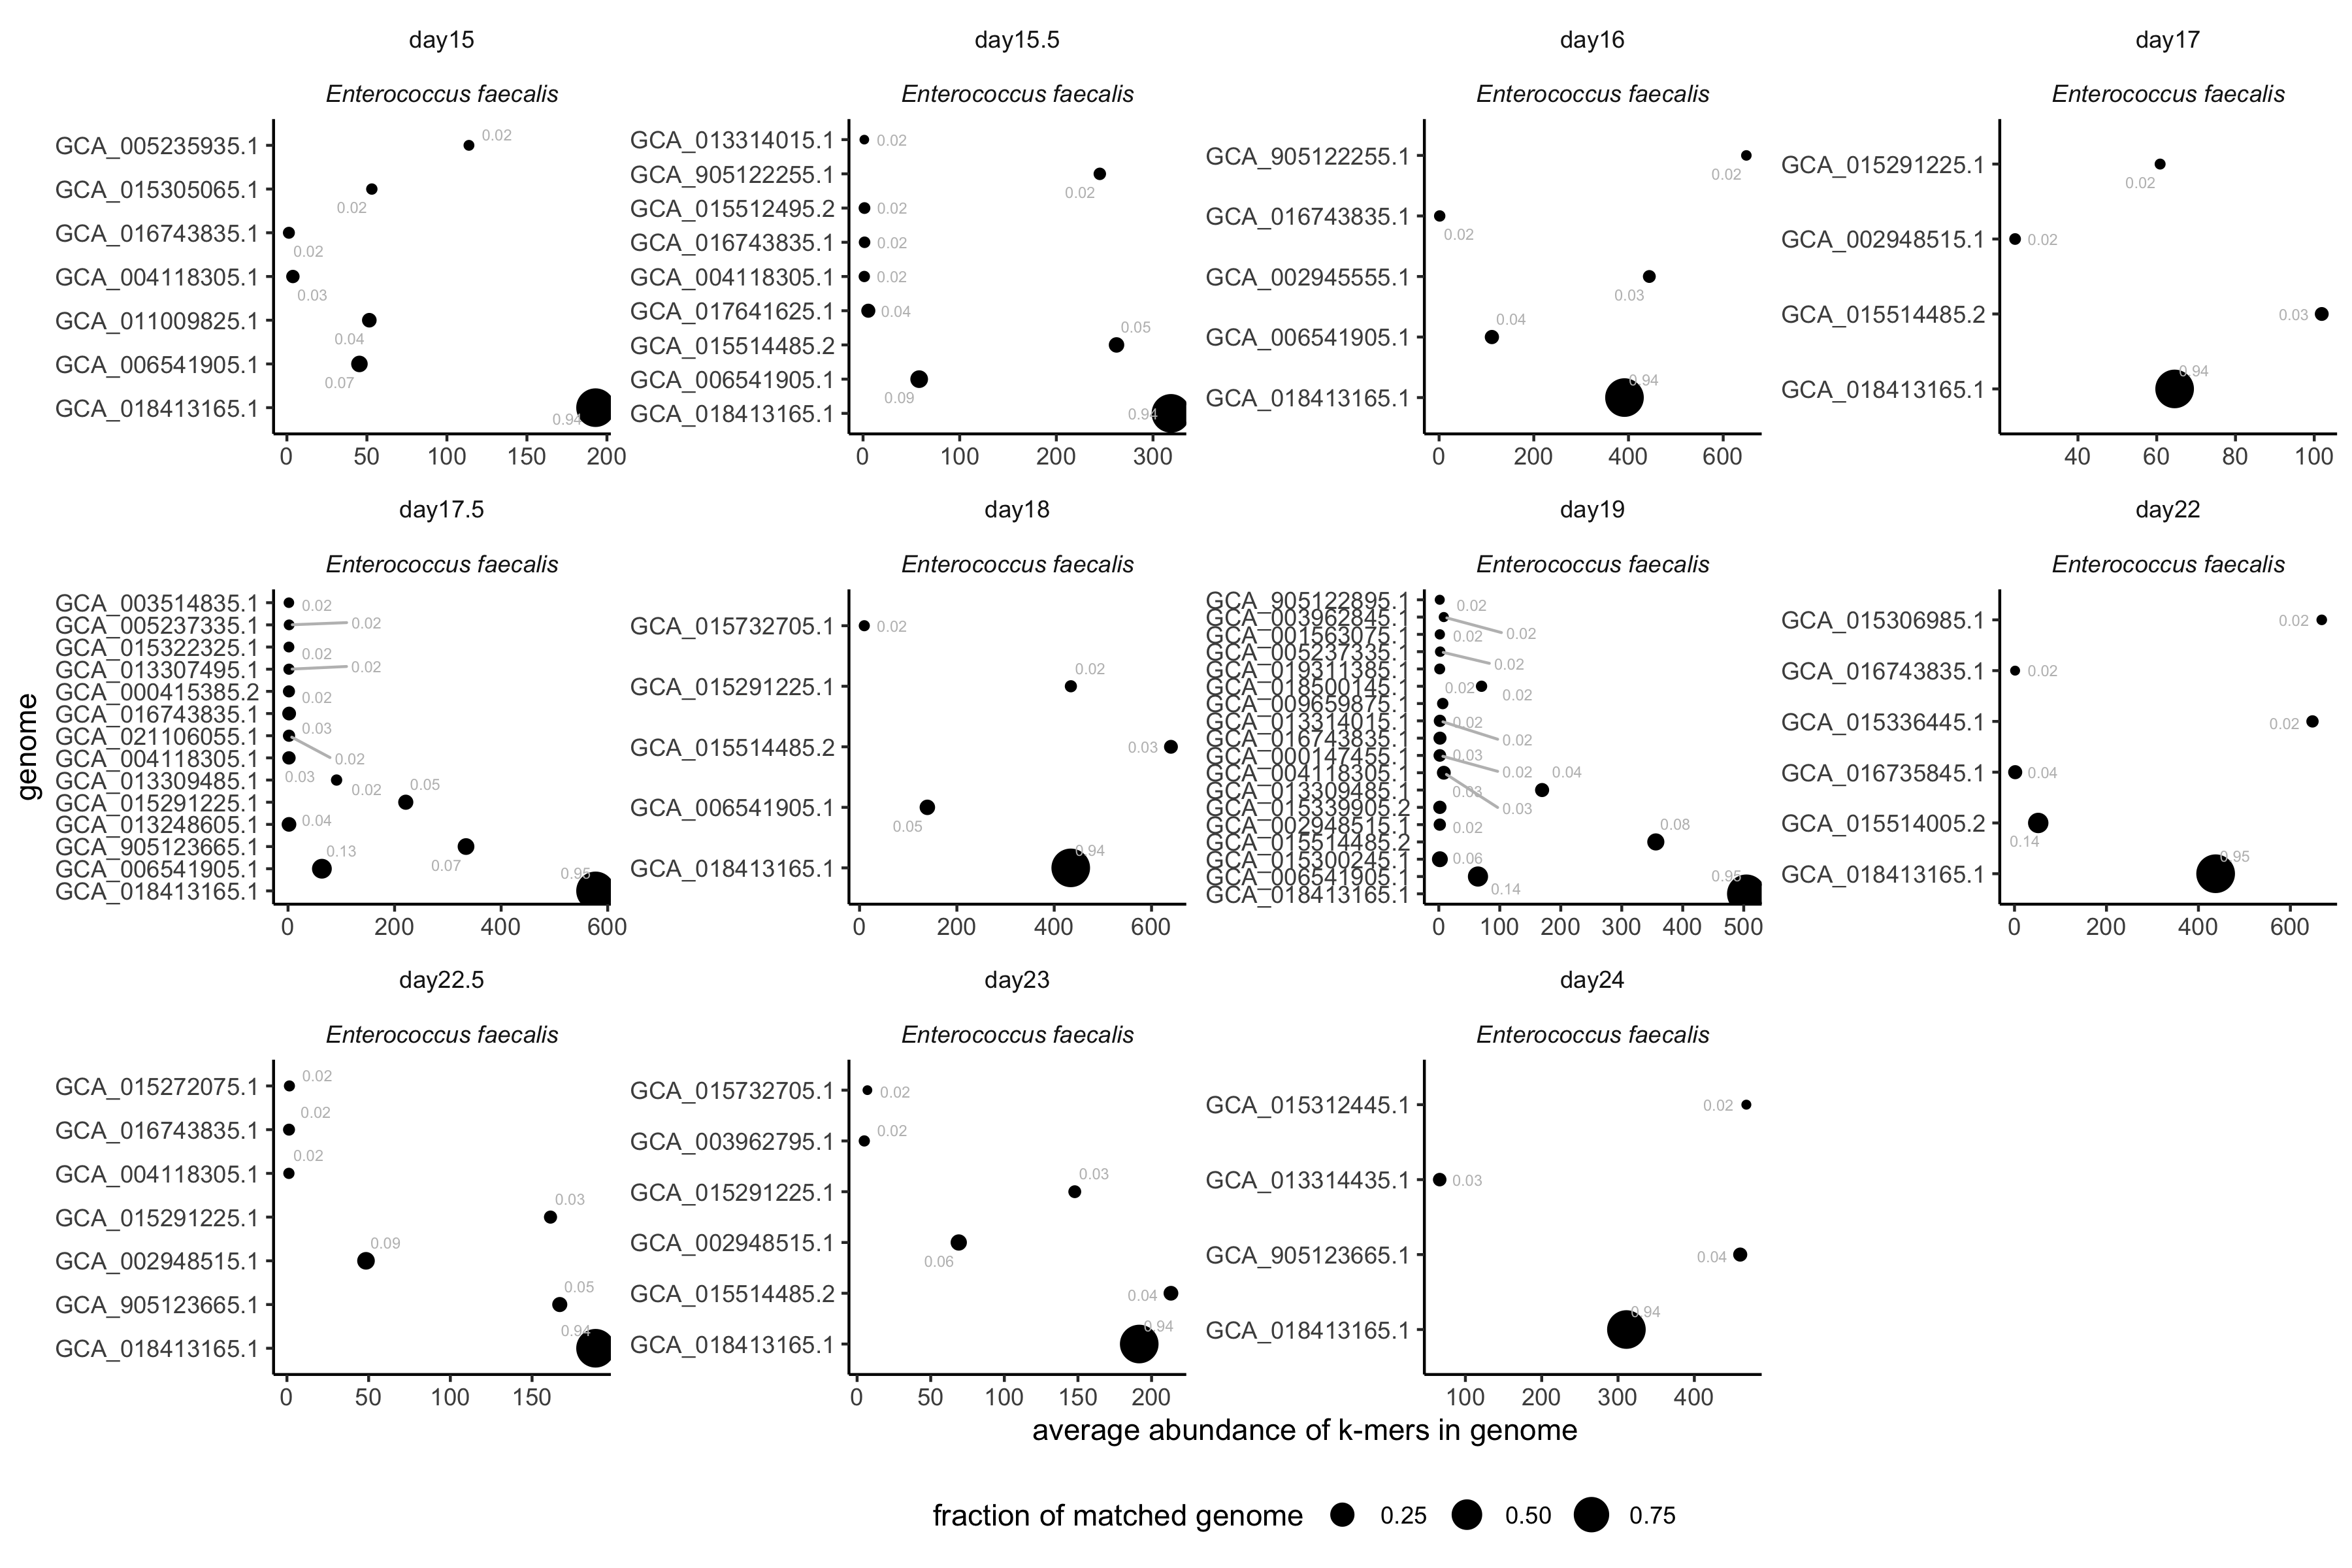

In [11]:
# adjust plot size rendered inline
options(repr.plot.width = 12, repr.plot.height = 8, repr.plot.res = 300)

infant_multi_strain_e_faec$plt +
 theme(legend.position = "bottom",
       strip.text = element_text(face = "italic")) +
 labs(size = "fraction of matched genome")

## Finegoldia magna

In [12]:
infant_taxonomy_annotate_df_f_magna <- infant_taxonomy_annotate_df %>%
  filter(species == "Finegoldia magna")

In [13]:
infant_multi_strain_f_magna <- from_taxonomy_annotate_to_multi_strains(infant_taxonomy_annotate_df_f_magna, 
                                                                       plot_threshold = 0.01)

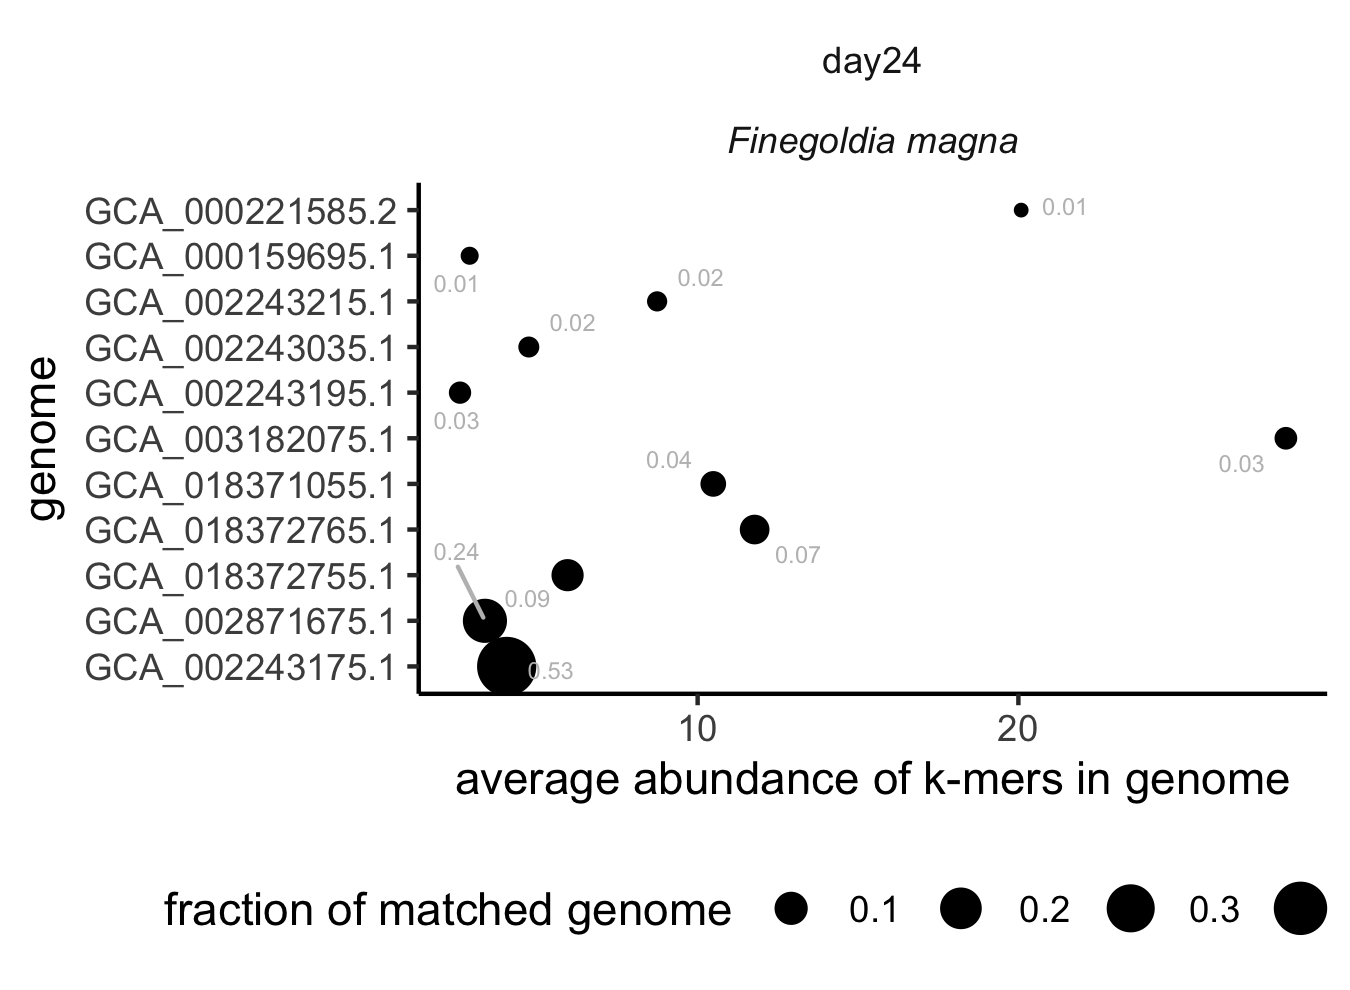

In [14]:
# adjust plot size rendered inline
options(repr.plot.width = 4.5, repr.plot.height = 3.3, repr.plot.res = 300)

infant_multi_strain_f_magna$plt +
 theme(legend.position = "bottom",
       strip.text = element_text(face = "italic")) +
 labs(size = "fraction of matched genome")

In [15]:
length(unique(infant_taxonomy_annotate_df$query_name))

[1] 11